C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


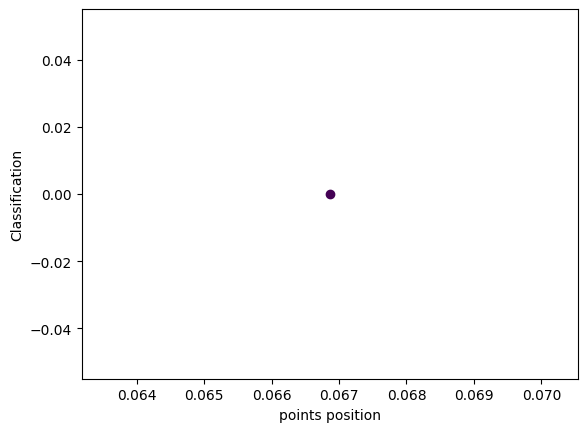

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv("2020_em_clustering.csv", sep=",", header=None)

# Perform k-means clustering
kmeans = KMeans(n_clusters=1)
kmeans.fit(data)
cluster_assignments = kmeans.predict(data)

# Plot the results
plt.scatter(data[0], [i for i in range(len(data))], c=cluster_assignments)
plt.xlabel("points position")
plt.ylabel("Classification")
plt.show()


In [2]:

def em_algorithm(data, k, max_iterations=100, tolerance=1e-6):
    n = data.shape[0]
    d = data.shape[1]
    
    # Initialize the means, covariances, and mixing coefficients
    means = np.zeros((k, d))
    covariances = np.zeros((k, d, d))
    mixing_coefficients = np.ones(k) / k
    responsibilities = np.zeros((n, k))
    
    # Initialize the means to random points in the data
    for i in range(k):
        means[i] = data[np.random.choice(n)]
        covariances[i] = np.identity(d)
        
    for iteration in range(max_iterations):
        # Expectation step
        for i in range(k):
            responsibilities[:, i] = mixing_coefficients[i] * np.exp(
                -0.5 * np.sum((data - means[i].reshape(1,-1))**2 / covariances[i], axis=1))
        responsibilities /= np.sum(responsibilities, axis=1).reshape(-1, 1)
        
        # Maximization step
        for i in range(k):
            N_k = np.sum(responsibilities[:, i])
            means[i] = np.sum(responsibilities[:, i].reshape(-1, 1) * data, axis=0) / N_k
            covariances[i] = np.sum(responsibilities[:, i].reshape(-1, 1) * 
                                    (data - means[i].reshape(1,-1))**2, axis=0) / N_k
            mixing_coefficients[i] = N_k / n
        
        # Check for convergence
        if np.max(np.abs(mixing_coefficients - mixing_coefficients_old)) < tolerance:
            break
        mixing_coefficients_old = mixing_coefficients.copy()
    
    return means, covariances, mixing_coefficients, responsibilities


In [3]:

# Load the data in numpy 
data_np = np.loadtxt("2020_em_clustering.csv", delimiter=',')

# Perform the EM algorithm and get the cluster assignments
means, covariances, mixing_coefficients, responsibilities = em_algorithm(data, 2)
cluster_assignments = np.argmax(responsibilities, axis=1)

# Plot the data with different colors based on the cluster assignments
for i in range(2):
    cluster = data_np[cluster_assignments == i]
    plt.scatter(cluster[:, 0], [0 for _ in range(cluster.shape[0])], marker="|", color=["blue", "red"][i])

plt.xlabel("points position")
plt.ylabel("Classification")
plt.show()


ValueError: Unable to coerce to DataFrame, shape must be (1, 40): given (40, 40)